### Doc2Vec

In [409]:
### Librerias necesarias Doc2Vec

import gensim
from gensim.models import Doc2Vec
from gensim.models.doc2vec import TaggedDocument

### Librerias necesarias para el preprocesamiento de texto
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split

### Otras librerias necesarias
import numpy as np
import pandas as pd
import re
import os
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, RegexpTokenizer
import unicodedata

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [410]:
### Descargar stopwords
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\USER\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

#### Cargar DataSet


In [411]:
Df = pd.read_csv("C:/Users/USER/OneDrive - universidadean.edu.co/5. NLP/Repositorio NLP/Actividad 1/reviews_booking.csv")
Df['Calificación'] = Df['Calificación'].astype(str).str.replace(',', '.').astype(float)
Df = Df.drop("Unnamed: 0", axis=1)
Df

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_34304\2155560498.py:1: DtypeWarning:

Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.



,País,Acomodación,Noches,Fecha hospedaje,Grupo viaje,Fecha reseña,Titulo,Calificación,Cosas Positivas,Cosas Negativas,reseña
0,Venezuela,NaN,2 noches,julio de 2023,En pareja,31 de julio de 2023,Excepcional,10.0,"Fue la Mejor Opción que pudimos haber tomado en Bogotá lo recomendamos mil % al regresar sin duda contactaremos al anfitrión porque fue todo un encanto. Limpio, Cómodo, Cercano a Todo, Súper Seguro fue increíble nuestra estancia",NaN,Sí
1,Colombia,NaN,4 noches,octubre de 2024,Persona que viaja sola,23 de octubre de 2024,Fantástica,10.0,"Ubicación, comodidades y limpieza",NaN,Sí
2,Colombia,NaN,1 noche,octubre de 2024,Persona que viaja sola,15 de octubre de 2024,Excepcional,10.0,"El lugar esta muy bien ubicado, el apartamento muy bonito y limpio. El afintrion fue supremamente atento a todo lo que necesité, totalmente un lugar recomendable.",NaN,Sí
3,Colombia,NaN,1 noche,agosto de 2024,En pareja,20 de agosto de 2024,Gran apartamento en una gran ubicación.,10.0,Todo estuvo perfecto. La ubicación y la relación calidad-precio fueron lo mejor.,NaN,Sí
4,Colombia,NaN,3 noches,marzo de 2024,En pareja,27 de marzo de 2024,Excepcional,10.0,"Es muy cómodo y acogedor, la atención es excelente. El espacio perfecto para descansar y disfrutar del centro histórico de Bogotá.",NaN,Sí
...,...,...,...,...,...,...,...,...,...,...,...
438208,Estados Unidos,Apartamento Suite,1 noche,septiembre de 2024,En familia,22 de octubre de 2024,Fantástico,9.0,NaN,NaN,No
438209,Colombia,Apartamento de 1 dormitorio,1 noche,octubre de 2024,Persona que viaja sola,9 de octubre de 2024,Excepcional,10.0,NaN,NaN,No
438210,México,Apartamento de 1 dormitorio,4 noches,agosto de 2024,Persona que viaja sola,6 de septiembre de 2024,Pésimo,1.0,No me pareció nada,"No obstante que dos días antes de mi llegada avise que llegaría a medianoche, me indicaron que si, sin embargo llegue y estaba ocupado por lo cual tuve que irme a las 2:00 am a buscar un lugar. Por que si dos días antes avise de mi hora de llegada y que les podría hacer una transferencia, me indicaron que no había problema por la hora de llegar y que pagara cuando arribara la lugar, soy de México y que pésimo servicio ofrecieron.",Sí
438211,Colombia,Apartamento de 1 dormitorio,2 noches,julio de 2024,En pareja,22 de julio de 2024,Excepcional,10.0,NaN,NaN,No


#### Ajuste DataFrame

In [412]:
# Crear una lista de stopwords
stop_words = set(stopwords.words('spanish'))

#Función para contar stopwords en un texto
def count_stopwords(text):
    if not isinstance(text, str):
        return 0
    words = text.split()
    return sum(1 for word in words if word.lower() in stop_words)

## Dataframe positivos
# Contar stopwords en la columna 'Cosas Positivas'
stopword_counts = Df['Cosas Positivas'].apply(count_stopwords)

# Filtrar filas con menos de 5 stopwords
Df_positivo = Df[stopword_counts >= 15]

# Filtrar filas donde 'Cosas Positivas' tenga más de #### palabra
Df_positivo = Df_positivo[Df_positivo['Cosas Positivas'].str.split().str.len() > 30]

# Filtrar filas donde 'Calificación' sea mayor a 9
Df_positivo = Df_positivo[Df_positivo['Calificación'] > 9]


## Dataframe negativos
# Contar stopwords en la columna 'Cosas Positivas'
stopword_counts = Df['Cosas Negativas'].apply(count_stopwords)

# Filtrar filas con menos de 5 stopwords
Df_negativo = Df[stopword_counts >= 20]

# Filtrar filas donde 'Cosas Positivas' tenga más de #### palabra
Df_negativo = Df_negativo[
    (Df_negativo['Cosas Negativas'].str.split().str.len() > 20) &
    (Df_negativo['Cosas Negativas'].str.split().str.len() <= 70)
]

# Filtrar filas donde 'Calificación' sea menor
Df_negativo = Df_negativo[Df_negativo['Calificación'] < 7]

In [413]:
# Crear una nueva columna para identificar los comentarios como positivos
Df_positivo['Etiqueta'] = 'positivo'

# Crear una nueva columna para identificar los comentarios como negativos
Df_negativo['Etiqueta'] = 'negativo'

# Renombrar la columna de los comentarios en ambos DataFrames para que sean iguales
Df_positivo = Df_positivo.rename(columns={'Cosas Positivas': 'Comentario'})
Df_negativo = Df_negativo.rename(columns={'Cosas Negativas': 'Comentario'})

# Combinar los dos DataFrames en uno solo
Df_unificado = pd.concat([Df_positivo[['Comentario', 'Etiqueta']], Df_negativo[['Comentario', 'Etiqueta']]])

# Resetear el índice del DataFrame combinado
Df_unificado  = Df_unificado .reset_index(drop=True)

Df_unificado

,Comentario,Etiqueta
0,"Fue la Mejor Opción que pudimos haber tomado en Bogotá lo recomendamos mil % al regresar sin duda contactaremos al anfitrión porque fue todo un encanto. Limpio, Cómodo, Cercano a Todo, Súper Seguro fue increíble nuestra estancia",positivo
1,"Me gusto Poder comprar los alimentos a mi gusto ya que cuentan con lo basico como ,cocina , nevera microondas ,esta muy equipado \nEl lugar es cómodo esta cerca de un centro comercial y cerca de la embajada de mexico me parecio perfecto 👌 para poder realizar mis tramites .\n La estadía es muy tranquila , la recomiendo esta ubicado en un lugar seguro que puedes salir a caminar sin preocupaciónes.",positivo
2,"La calidad de personas es maravilloso, desde que te reciben, cuando te dan el desayuno, hasta la despedida. Es un lugar bastante acogedor, silencioso, muy cómodo, no te da frío en la noche y compartes en las zonas comunes con personas de otros lugares. Estuve en el hostel por motivos de visa alemana y la embajada quedaba muy cerca. Todo estuvo perfecto, aseado, bonito, barato. Super recomendado!",positivo
3,"La atención como me recibieron es muy buena por parte del señor Raul, quien trabaja en mencionado hotel, es muy atento en lo que uno necesita, de igual manera la instalación del hotel es muy linda tanto en el lugar como en la higiene del mismo, muy agradecido por la acogida. 100% recomendado el hotel.",positivo
4,"El hotel es muy acogedor, está ubicado en una zona muy céntrica. Está bastante cerca de Corferias. La atención fue muy buena, siempre fueron muy amables y atentos a la logística, incluso nos dejaron tener las maletas guardadas después de la hora del check out mientras realizamos unas últimas diligencias antes de viajar. La habitación siempre estuvo limpia igual que el baño.",positivo
...,...,...
10742,"Nada, no pude alojarme porque simplemente cancelaron la reserva.\nDe acuerdo a booking se puede realizar check-in hasta las 7 de la noche, llegue a las 6:45 y me indican que ya no tenían disponibilidad de habitaciones, además que la reserva por booking la habían cancelado desde las 5 pero nunca fui notificado.",negativo
10743,"Ya habíamos ido anteriormente y nos valió $150 la noche incluyendo parqueadero para moto, por reservar por la aplicación me cobraron de más y adicional el parqueadero 20 y me obligan a pagar antes si no me quitan la reserva",negativo
10744,"Publicidad engañosa, ofrecen servicios que no tiene capacidad de prestar, solicite una habitación y me ubicaron en un apartamento para más de 10 personas, servicio diferente al solicitado, mal aspecto del baño, no televisor, no elementos de aseo, camas en mal estado, tendidos y toallas viejas, resortes de cama reventados, no entregan factura.",negativo
10745,"Tv sin control remoto., baños con pisos muy peligrosos, no hay alfombra de goma en la duchas. Muy peligroso.(Tuve una caída., gracias a dios sin grandes daños., solo un corte en un dedo) Pero es muy deslizante el piso., lo otro solo una toalla, no había jabón en las duchas.",negativo


In [414]:
# Dividir el dataset en entrenamiento y prueba (sin variable objetivo)
train_df, test_df = train_test_split(Df_unificado, test_size=0.2, random_state=42)

# Verificar las dimensiones
print("Shape of X_train:", train_df.shape)
print("Shape of X_test:", test_df.shape)

train_df

Shape of X_train: (8597, 2)
Shape of X_test: (2150, 2)


,Comentario,Etiqueta
4335,"Tuve una excelente experiencia. El hotel está muy bien ubicado y todo fue genial. El primer día que llegué a Bogotá, me sentí mal debido al mal de altura. Sin embargo, recibí unas atenciones excelentes por parte de una de las chicas de recepción. Incluso me preparó un té y estuvo siempre pendiente de cómo me sentía. Realmente me sentí sumamente agradecido por ese gesto tan amable.",positivo
353,"El personal de lujo del hotel, Jesús, Junior fueron excelentes en cuanto a la atención, siempre dispuestos, siempre atentos. El desayuno es variado, la selección de frutas y bebidas es espectacular. La distribución y espacio de las habitaciones es excelente.",positivo
456,"Excelente atención, los recepcionistas te dan muchos consejos y están a tu disposición siempre. Las instalaciones muy limpias y bien mantenidas. Queda cerca de muchos sectores turísticos de Bogotá, como museos y cerros.",positivo
5317,El desayuno es variado y abundante el buffet.\nLa ubicación de hotel es muy central cerca de la 7\nLa limpieza y atención impecable.\nLa amabilidad de las personas de servicio muy atentas,positivo
239,"Estuve con mi familia y nos atendieron súper bien, el personal del hotel es muy respetuoso y eficiente; nos recomendaron sitios turísticos cerca al hotel y nos ofrecieron el servicio de transporte con don Rubén, un señor muy atento.",positivo
...,...,...
5734,"La calidad humana con la que fui acogida y tratada durante mi estadía.\nEl espectacular mirador, donde podemos ver la ciudad y los cerros orientales.\nLas áreas comunes de cocina y zonas de integración, estudio y/o recreación.",positivo
5191,"El desayuno es espectacular; su personal muy amable, especialmente Karina (de la recepción), que resolvió todos y cada uno de mis requerimientos aun cuando no tuvieran relación con el hospedaje propiamente tal.",positivo
5390,"El hostal es muy agreable. Tiene areas differente para relaxarse, un restaurant y bar. La ubicacion es perfecto, en el centro de la Candelaria, cerca de bars, restaurantes y supermercados. El hostal es muy limpio y el personal muy agradable. Miguel me ha ayudado mucho con cosas differentes. No conoce el estrés, es amable con todos y realmente te ayuda con todo.",positivo
860,"La atención de doña Gladis es espectacular, toda su familia es muy amable y si es tu primera vez en Bogotá te guían para que sepas cuál es la mejor ruta o medio de transporte para transportarte en la ciudad 🙏🏻",positivo


In [415]:
print(type(Df_unificado))
print(Df_unificado.keys())  # Si es un diccionario, mostrará las claves disponibles


<class 'pandas.core.frame.DataFrame'>
Index(['Comentario', 'Etiqueta'], dtype='object')


In [416]:
# Verificar las dimensiones
print("Shape of train data: ", train_df.shape)
print("Shape of test data: ", test_df.shape)

# Mostrar los primeros registros del conjunto de entrenamiento
train_df.head()

Shape of train data:  (8597, 2)
Shape of test data:  (2150, 2)


,Comentario,Etiqueta
4335,"Tuve una excelente experiencia. El hotel está muy bien ubicado y todo fue genial. El primer día que llegué a Bogotá, me sentí mal debido al mal de altura. Sin embargo, recibí unas atenciones excelentes por parte de una de las chicas de recepción. Incluso me preparó un té y estuvo siempre pendiente de cómo me sentía. Realmente me sentí sumamente agradecido por ese gesto tan amable.",positivo
353,"El personal de lujo del hotel, Jesús, Junior fueron excelentes en cuanto a la atención, siempre dispuestos, siempre atentos. El desayuno es variado, la selección de frutas y bebidas es espectacular. La distribución y espacio de las habitaciones es excelente.",positivo
456,"Excelente atención, los recepcionistas te dan muchos consejos y están a tu disposición siempre. Las instalaciones muy limpias y bien mantenidas. Queda cerca de muchos sectores turísticos de Bogotá, como museos y cerros.",positivo
5317,El desayuno es variado y abundante el buffet.\nLa ubicación de hotel es muy central cerca de la 7\nLa limpieza y atención impecable.\nLa amabilidad de las personas de servicio muy atentas,positivo
239,"Estuve con mi familia y nos atendieron súper bien, el personal del hotel es muy respetuoso y eficiente; nos recomendaron sitios turísticos cerca al hotel y nos ofrecieron el servicio de transporte con don Rubén, un señor muy atento.",positivo


In [417]:
test_df.head()

,Comentario,Etiqueta
668,"Genial el lugar, la ubicación es muy buena, una zona segura para caminar incluso de noche, muchas opciones de restaurantes súper cerca, las toallas son gratis, el personal fue muy amable, no hubo problemas con el agua caliente. La verdad, me parece una de las mejores opciones considerando la calidad del servicio de otros Hostels de la zona y del mismo rango de precios. Tienen zonas muy buenas para trabajar con tu laptop y un café bar dentro del mismo hostel.",positivo
4874,"La ubicación y la atención de todo el personal del hotel y en especial la gente de restaurant. Todos amables y educados, Se agradece hacer que uno se sienta bien y comodo.",positivo
7410,El hotel esta deteriorado. Los baños en mal estado. La ropa de cama y toallas rotas. El balcón sucio. Las almohadas viejas. Y lo peor de todo La reserva la hice como extranjera y como uno de los huéspedes que invite traía cedula colombiana nos cobraron IVA. CASO Q NO APLICA POR CUANTO LA RESRVA ESTA A MI NOMBRE Y FUI YO QUIEN PAGO.,negativo
8274,La habitación no cumplió con las expectativas puesto que: \n1. La puerta del baño no cerraba y tenía la chapa dañada\n2. La cama era extremadamente dura \n3. Solo tenía 1 cobija \n4. El tamaño de la cama para una pareja era muy pequeña,negativo
8197,"La nevera sonaba como un motor de avión y estaba al lado de la cama, en la recepción pusieron regaeton toda la noche y se escuchaba en la habitación, el desayuno pésimo, el cuarto muy pequeño y se escuchaba todo lo de las otras habitaciones … la peor experiencia",negativo


#### Preprocesamiento

In [418]:
# Convertir a minúsculas las columnas específicas
train_df["Comentario"] = train_df["Comentario"].str.lower()
test_df["Comentario"] = test_df["Comentario"].str.lower()

# Añadir espacio después de ciertos caracteres
caracteres = r'[.,;]'
train_df["Comentario"] = train_df["Comentario"].str.replace(caracteres, lambda m: m.group(0) + ' ', regex=True)
test_df["Comentario"] = test_df["Comentario"].str.replace(caracteres, lambda m: m.group(0) + ' ', regex=True)

# Eliminar caracteres especiales
train_df["Comentario"] = train_df["Comentario"].str.replace(r"[\W_]+", " ", regex=True)
test_df["Comentario"] = test_df["Comentario"].str.replace(r"[\W_]+", " ", regex=True)

# Eliminar números
train_df["Comentario"] = train_df["Comentario"].str.replace(r"\d+", "", regex=True)
test_df["Comentario"] = test_df["Comentario"].str.replace(r"\d+", "", regex=True)

# Función para eliminar tildes
def eliminar_tildes(texto):
    if isinstance(texto, str):  # Verifica que sea texto
        return ''.join(
            char for char in unicodedata.normalize('NFD', texto)
            if unicodedata.category(char) != 'Mn'
        )
    return texto

# Aplicar la función a las columnas
train_df["text_pre"] = train_df["Comentario"].apply(eliminar_tildes)
test_df["text_pre"] = test_df["Comentario"].apply(eliminar_tildes)

train_df

,Comentario,Etiqueta,text_pre
4335,tuve una excelente experiencia el hotel está muy bien ubicado y todo fue genial el primer día que llegué a bogotá me sentí mal debido al mal de altura sin embargo recibí unas atenciones excelentes por parte de una de las chicas de recepción incluso me preparó un té y estuvo siempre pendiente de cómo me sentía realmente me sentí sumamente agradecido por ese gesto tan amable,positivo,tuve una excelente experiencia el hotel esta muy bien ubicado y todo fue genial el primer dia que llegue a bogota me senti mal debido al mal de altura sin embargo recibi unas atenciones excelentes por parte de una de las chicas de recepcion incluso me preparo un te y estuvo siempre pendiente de como me sentia realmente me senti sumamente agradecido por ese gesto tan amable
353,el personal de lujo del hotel jesús junior fueron excelentes en cuanto a la atención siempre dispuestos siempre atentos el desayuno es variado la selección de frutas y bebidas es espectacular la distribución y espacio de las habitaciones es excelente,positivo,el personal de lujo del hotel jesus junior fueron excelentes en cuanto a la atencion siempre dispuestos siempre atentos el desayuno es variado la seleccion de frutas y bebidas es espectacular la distribucion y espacio de las habitaciones es excelente
456,excelente atención los recepcionistas te dan muchos consejos y están a tu disposición siempre las instalaciones muy limpias y bien mantenidas queda cerca de muchos sectores turísticos de bogotá como museos y cerros,positivo,excelente atencion los recepcionistas te dan muchos consejos y estan a tu disposicion siempre las instalaciones muy limpias y bien mantenidas queda cerca de muchos sectores turisticos de bogota como museos y cerros
5317,el desayuno es variado y abundante el buffet la ubicación de hotel es muy central cerca de la la limpieza y atención impecable la amabilidad de las personas de servicio muy atentas,positivo,el desayuno es variado y abundante el buffet la ubicacion de hotel es muy central cerca de la la limpieza y atencion impecable la amabilidad de las personas de servicio muy atentas
239,estuve con mi familia y nos atendieron súper bien el personal del hotel es muy respetuoso y eficiente nos recomendaron sitios turísticos cerca al hotel y nos ofrecieron el servicio de transporte con don rubén un señor muy atento,positivo,estuve con mi familia y nos atendieron super bien el personal del hotel es muy respetuoso y eficiente nos recomendaron sitios turisticos cerca al hotel y nos ofrecieron el servicio de transporte con don ruben un senor muy atento
...,...,...,...
5734,la calidad humana con la que fui acogida y tratada durante mi estadía el espectacular mirador donde podemos ver la ciudad y los cerros orientales las áreas comunes de cocina y zonas de integración estudio y o recreación,positivo,la calidad humana con la que fui acogida y tratada durante mi estadia el espectacular mirador donde podemos ver la ciudad y los cerros orientales las areas comunes de cocina y zonas de integracion estudio y o recreacion
5191,el desayuno es espectacular su personal muy amable especialmente karina de la recepción que resolvió todos y cada uno de mis requerimientos aun cuando no tuvieran relación con el hospedaje propiamente tal,positivo,el desayuno es espectacular su personal muy amable especialmente karina de la recepcion que resolvio todos y cada uno de mis requerimientos aun cuando no tuvieran relacion con el hospedaje propiamente tal
5390,el hostal es muy agreable tiene areas differente para relaxarse un restaurant y bar la ubicacion es perfecto en el centro de la candelaria cerca de bars restaurantes y supermercados el hostal es muy limpio y el personal muy agradable miguel me ha ayudado mucho con cosas differentes no conoce el estrés es amable con todos y realmente te ayuda con todo,positivo,el hostal es muy agreable tiene areas differente para relaxarse un restaurant y bar la ubicacion es perfecto en el centro de la candelaria

In [419]:


# Crear el tokenizador con expresión regular para palabras
tokenizer = RegexpTokenizer(r'\w+')

# Tokenizando el texto

train_df['text_tokens'] = train_df['text_pre'].apply(lambda x: x.split())
test_df['text_tokens'] = test_df['text_pre'].apply(lambda x: x.split())

train_df.head()

,Comentario,Etiqueta,text_pre,text_tokens
4335,tuve una excelente experiencia el hotel está muy bien ubicado y todo fue genial el primer día que llegué a bogotá me sentí mal debido al mal de altura sin embargo recibí unas atenciones excelentes por parte de una de las chicas de recepción incluso me preparó un té y estuvo siempre pendiente de cómo me sentía realmente me sentí sumamente agradecido por ese gesto tan amable,positivo,tuve una excelente experiencia el hotel esta muy bien ubicado y todo fue genial el primer dia que llegue a bogota me senti mal debido al mal de altura sin embargo recibi unas atenciones excelentes por parte de una de las chicas de recepcion incluso me preparo un te y estuvo siempre pendiente de como me sentia realmente me senti sumamente agradecido por ese gesto tan amable,"[tuve, una, excelente, experiencia, el, hotel, esta, muy, bien, ubicado, y, todo, fue, genial, el, primer, dia, que, llegue, a, bogota, me, senti, mal, debido, al, mal, de, altura, sin, embargo, recibi, unas, atenciones, excelentes, por, parte, de, una, de, las, chicas, de, recepcion, incluso, me, preparo, un, te, y, estuvo, siempre, pendiente, de, como, me, sentia, realmente, me, senti, sumamente, agradecido, por, ese, gesto, tan, amable]"
353,el personal de lujo del hotel jesús junior fueron excelentes en cuanto a la atención siempre dispuestos siempre atentos el desayuno es variado la selección de frutas y bebidas es espectacular la distribución y espacio de las habitaciones es excelente,positivo,el personal de lujo del hotel jesus junior fueron excelentes en cuanto a la atencion siempre dispuestos siempre atentos el desayuno es variado la seleccion de frutas y bebidas es espectacular la distribucion y espacio de las habitaciones es excelente,"[el, personal, de, lujo, del, hotel, jesus, junior, fueron, excelentes, en, cuanto, a, la, atencion, siempre, dispuestos, siempre, atentos, el, desayuno, es, variado, la, seleccion, de, frutas, y, bebidas, es, espectacular, la, distribucion, y, espacio, de, las, habitaciones, es, excelente]"
456,excelente atención los recepcionistas te dan muchos consejos y están a tu disposición siempre las instalaciones muy limpias y bien mantenidas queda cerca de muchos sectores turísticos de bogotá como museos y cerros,positivo,excelente atencion los recepcionistas te dan muchos consejos y estan a tu disposicion siempre las instalaciones muy limpias y bien mantenidas queda cerca de muchos sectores turisticos de bogota como museos y cerros,"[excelente, atencion, los, recepcionistas, te, dan, muchos, consejos, y, estan, a, tu, disposicion, siempre, las, instalaciones, muy, limpias, y, bien, mantenidas, queda, cerca, de, muchos, sectores, turisticos, de, bogota, como, museos, y, cerros]"
5317,el desayuno es variado y abundante el buffet la ubicación de hotel es muy central cerca de la la limpieza y atención impecable la amabilidad de las personas de servicio muy atentas,positivo,el desayuno es variado y abundante el buffet la ubicacion de hotel es muy central cerca de la la limpieza y atencion impecable la amabilidad de las personas de servicio muy atentas,"[el, desayuno, es, variado, y, abundante, el, buffet, la, ubicacion, de, hotel, es, muy, central, cerca, de, la, la, limpieza, y, atencion, impecable, la, amabilidad, de, las, personas, de, servicio, muy, atentas]"
239,estuve con mi familia y nos atendieron súper bien el personal del hotel es muy respetuoso y eficiente nos recomendaron sitios turísticos cerca al hotel y nos ofrecieron el servicio de transporte con don rubén un señor muy atento,positivo,estuve con mi familia y nos atendieron super bien el personal del hotel es muy respetuoso y eficiente nos recomendaron sitios turisticos cerca al hotel y nos ofrecieron el servicio de transporte con don ruben un senor muy atento,"[estuve, con, mi, familia, y, nos, atendieron, super, bien, el, personal, del, hotel, es, muy, respetuoso, y, eficiente, nos, recomendaron, sitios, turisticos, cerca, al, hotel, y

In [420]:
# Carga las stopwords en español
stop_words = set(stopwords.words('spanish'))
print(f"Stopwords en español: {stop_words}")

def eliminar_stopwords(lista_palabras):
    if isinstance(lista_palabras, list):  # Verifica si es una lista
        procesadas = [palabra.lower() for palabra in lista_palabras if palabra.lower() not in stop_words]
        return procesadas
    else:
        print(f"No es una lista: {lista_palabras}")  # Debug
        return lista_palabras  # Si no es una lista, devuelve sin cambios

# Aplicar la función
train_df["text_ok"] = train_df["text_tokens"].apply(eliminar_stopwords)
test_df["text_ok"] = test_df["text_tokens"].apply(eliminar_stopwords)


Stopwords en español: {'estuvieron', 'estaría', 'me', 'al', 'hubieron', 'hubiese', 'tuviese', 'estaréis', 'habidos', 'con', 'también', 'estarás', 'seáis', 'tus', 'todo', 'estada', 'habría', 'otras', 'ya', 'o', 'hubieses', 'sentido', 'ese', 'unos', 'soy', 'tuvimos', 'tu', 'contra', 'seas', 'seré', 'estado', 'tengáis', 'qué', 'las', 'nuestros', 'nuestra', 'tenidas', 'suyas', 'estos', 'estarías', 'tendrían', 'tuviste', 'tienen', 'tenemos', 'habrías', 'fuese', 'estemos', 'estaré', 'vosotras', 'habrán', 'fuéramos', 'sentid', 'estabas', 'hubiéramos', 'habían', 'sea', 'teníais', 'vuestros', 'tuve', 'que', 'sintiendo', 'ellos', 'tenéis', 'tuviésemos', 'eran', 'estuviesen', 'siente', 'antes', 'estéis', 'tened', 'están', 'sobre', 'estuve', 'suyo', 'uno', 'hubierais', 'esos', 'tuviéramos', 'hubiésemos', 'tendría', 'estén', 'estás', 'tuvieseis', 'hayamos', 'os', 'el', 'haya', 'donde', 'hubiste', 'estuvieseis', 'estuvieses', 'habidas', 'a', 'fuesen', 'sí', 'hubiesen', 'estuvimos', 'tendríamos', 'es

In [421]:
print(train_df.columns)


Index(['Comentario', 'Etiqueta', 'text_pre', 'text_tokens', 'text_ok'], dtype='object')


In [422]:
import spacy

# Carga del modelo de spaCy para español
nlp = spacy.load("es_core_news_sm")

# Función para lematizar (sin eliminar stopwords)
def solo_lematizar(lista_palabras):
    if isinstance(lista_palabras, list):  # Verifica si es una lista
        texto = " ".join(lista_palabras)  # Convierte la lista a texto
        doc = nlp(texto)  # Procesa el texto con spaCy
        # Devuelve las lemas de las palabras
        return [token.lemma_ for token in doc]
    elif isinstance(lista_palabras, str):  # Si es un texto plano
        doc = nlp(lista_palabras)  # Procesa el texto con spaCy
        return [token.lemma_ for token in doc]
    else:
        return lista_palabras  # Devuelve sin cambios si no es lista o texto

# Aplicar a las columnas correspondientes
train_df["text_le"] = train_df["text_ok"].apply(solo_lematizar)
test_df["text_le"] = test_df["text_ok"].apply(solo_lematizar)

# Ver los resultados
train_df.head()


,Comentario,Etiqueta,text_pre,text_tokens,text_ok,text_le
4335,tuve una excelente experiencia el hotel está muy bien ubicado y todo fue genial el primer día que llegué a bogotá me sentí mal debido al mal de altura sin embargo recibí unas atenciones excelentes por parte de una de las chicas de recepción incluso me preparó un té y estuvo siempre pendiente de cómo me sentía realmente me sentí sumamente agradecido por ese gesto tan amable,positivo,tuve una excelente experiencia el hotel esta muy bien ubicado y todo fue genial el primer dia que llegue a bogota me senti mal debido al mal de altura sin embargo recibi unas atenciones excelentes por parte de una de las chicas de recepcion incluso me preparo un te y estuvo siempre pendiente de como me sentia realmente me senti sumamente agradecido por ese gesto tan amable,"[tuve, una, excelente, experiencia, el, hotel, esta, muy, bien, ubicado, y, todo, fue, genial, el, primer, dia, que, llegue, a, bogota, me, senti, mal, debido, al, mal, de, altura, sin, embargo, recibi, unas, atenciones, excelentes, por, parte, de, una, de, las, chicas, de, recepcion, incluso, me, preparo, un, te, y, estuvo, siempre, pendiente, de, como, me, sentia, realmente, me, senti, sumamente, agradecido, por, ese, gesto, tan, amable]","[excelente, experiencia, hotel, bien, ubicado, genial, primer, dia, llegue, bogota, senti, mal, debido, mal, altura, embargo, recibi, unas, atenciones, excelentes, parte, chicas, recepcion, incluso, preparo, siempre, pendiente, sentia, realmente, senti, sumamente, agradecido, gesto, tan, amable]","[excelente, experiencia, hotel, bien, ubicado, genial, primero, dia, llegar, bogota, senti, mal, debido, mal, altura, embargo, recibi, uno, atención, excelente, parte, chica, recepcion, incluso, preparo, siempre, pendiente, sentia, realmente, senti, sumamente, agradecido, gesto, tanto, amable]"
353,el personal de lujo del hotel jesús junior fueron excelentes en cuanto a la atención siempre dispuestos siempre atentos el desayuno es variado la selección de frutas y bebidas es espectacular la distribución y espacio de las habitaciones es excelente,positivo,el personal de lujo del hotel jesus junior fueron excelentes en cuanto a la atencion siempre dispuestos siempre atentos el desayuno es variado la seleccion de frutas y bebidas es espectacular la distribucion y espacio de las habitaciones es excelente,"[el, personal, de, lujo, del, hotel, jesus, junior, fueron, excelentes, en, cuanto, a, la, atencion, siempre, dispuestos, siempre, atentos, el, desayuno, es, variado, la, seleccion, de, frutas, y, bebidas, es, espectacular, la, distribucion, y, espacio, de, las, habitaciones, es, excelente]","[personal, lujo, hotel, jesus, junior, excelentes, cuanto, atencion, siempre, dispuestos, siempre, atentos, desayuno, variado, seleccion, frutas, bebidas, espectacular, distribucion, espacio, habitaciones, excelente]","[personal, lujo, hotel, jesus, junior, excelente, cuanto, atencion, siempre, dispuesto, siempre, atento, desayuno, variado, seleccion, fruta, bebida, espectacular, distribucion, espacio, habitación, excelente]"
456,excelente atención los recepcionistas te dan muchos consejos y están a tu disposición siempre las instalaciones muy limpias y bien mantenidas queda cerca de muchos sectores turísticos de bogotá como museos y cerros,positivo,excelente atencion los recepcionistas te dan muchos consejos y estan a tu disposicion siempre las instalaciones muy limpias y bien mantenidas queda cerca de muchos sectores turisticos de bogota como museos y cerros,"[excelente, atencion, los, recepcionistas, te, dan, muchos, consejos, y, estan, a, tu, disposicion, siempre, las, instalaciones, muy, limpias, y, bien, mantenidas, queda, cerca, de, muchos, sectores, turisticos, de, bogota, como, museos, y, cerros]","[excelente, atencion, recepcionistas, dan, consejos, estan, disposicion, siempre, instalaciones, limpias, bien, mantenidas, queda, cerca, sectores, turisticos, bogota, museos, cerros]","[excelente, a

## 4. Modelo de Clasificación de Texto

Una vez que hemos preprocesado los textos, podemos aplicar un modelo de clasificación no supervisado para agruparlos en categorías o clusters. En este caso, utilizaremos el algoritmo de clustering KMeans para agrupar los textos en clusters. AUnque primero debemos convertir los textos en vectores numéricos utilizando embeddings de palabras.


In [423]:
# Entrenando el modelo Doc2Vec

documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(train_df['text_le'])]

# Definiendo el modelo Doc2Vec

model = Doc2Vec(documents, vector_size=100, window=2, min_count=1, workers=4)

# Guardando el modelo entrenado

model.save("doc2vec.model")


In [424]:
# Cargando el modelo entrenado

model = Doc2Vec.load("doc2vec.model")


# Obteniendo las palabras más similares a una palabra

model.wv.most_similar('excelente')


[('genial', 0.9439723491668701),
 ('inmejorable', 0.9327858686447144),
 ('excepcional', 0.9280014634132385),
 ('encanto', 0.9248713254928589),
 ('increible', 0.9242265820503235),
 ('fantastico', 0.9231003522872925),
 ('espectacular', 0.9176164269447327),
 ('buen', 0.9168497323989868),
 ('maravilloso', 0.9166656732559204),
 ('estupendo', 0.9089991450309753)]

In [425]:
# Obteniendo la similitud entre dos palabras

model.wv.similarity('hotel', 'hospedaje')


0.8512216

In [426]:
""""
# Supongamos que `model.dv` contiene los vectores
vectors = np.array([model.dv[i] for i in range(len(model.dv))])  # Convertir a un array de NumPy
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Crear una gráfica más clara
plt.figure(figsize=(10, 8))
plt.scatter(vectors_2d[:, 0], vectors_2d[:, 1], c='blue', alpha=0.6, s=10, edgecolor='k')
plt.title("Visualización de vectores Doc2Vec (t-SNE)", fontsize=14)
plt.xlabel("Dimensión 1", fontsize=12)
plt.ylabel("Dimensión 2", fontsize=12)
plt.grid(True, alpha=0.3)
plt.show()




SyntaxError: incomplete input (2690689733.py, line 1)

In [ ]:
"""
from bokeh.models import ColumnDataSource, HoverTool
from bokeh.plotting import figure, show
from sklearn.manifold import TSNE
import numpy as np
import pandas as pd

# Supongamos que `model.wv` contiene las palabras y los vectores
# Reemplaza esto por tus datos reales
words = list(model.wv.index_to_key)  # Lista de palabras
vectors = np.array([model.wv[word] for word in words])  # Vectores de las palabras

# Aplicar t-SNE
tsne = TSNE(n_components=2, random_state=42)
vectors_2d = tsne.fit_transform(vectors)

# Crear un DataFrame para el gráfico
df = pd.DataFrame(vectors_2d, columns=["Dimensión 1", "Dimensión 2"])
df['Palabra'] = words  # Agregar las palabras como etiquetas

# Crear una fuente de datos para Bokeh
source = ColumnDataSource(data=dict(
    x=df["Dimensión 1"],
    y=df["Dimensión 2"],
    palabra=df["Palabra"]
))

# Crear una figura
p = figure(
    title="Visualización de vectores Word2Vec (t-SNE)",
    x_axis_label="Dimensión 1",
    y_axis_label="Dimensión 2",
    tools="pan,wheel_zoom,reset",
    tooltips=[("Palabra", "@palabra"), ("Dim 1", "@x"), ("Dim 2", "@y")],
    width=800,
    height=600
)

# Agregar los puntos
p.circle('x', 'y', size=8, source=source, fill_alpha=0.6, line_color="black", line_width=0.5)

# Mostrar el gráfico
show(p)


SyntaxError: unterminated string literal (detected at line 1) (704333549.py, line 1)

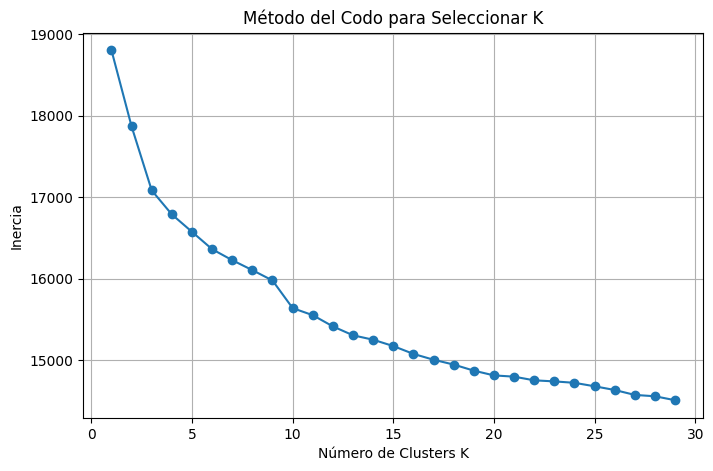

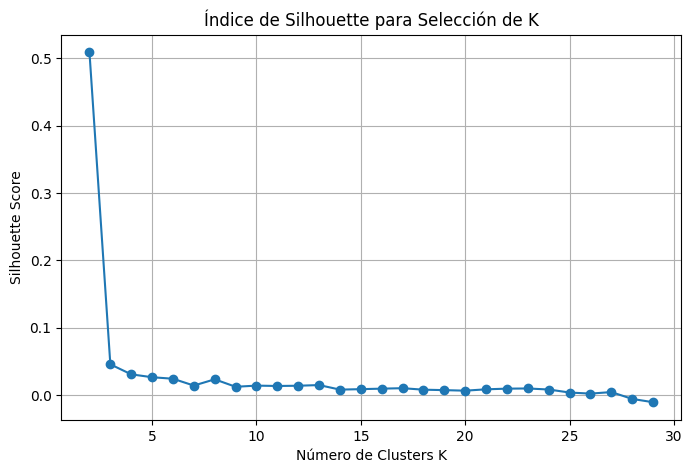

In [431]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Supongamos que ya tienes un modelo de Doc2Vec entrenado llamado 'doc2vec_model'

# Generar vectores para los textos (sin usar .split())
X = [doc2vec_model.infer_vector(doc) for doc in train_df['text_le']]

# Método del codo para seleccionar K
inertias = []
K_range = range(1, 30)

for k in K_range:  # Para cada valor de K
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertias.append(kmeans.inertia_)

# Graficar el método del codo
plt.figure(figsize=(8, 5))
plt.plot(K_range, inertias, marker='o')
plt.title("Método del Codo para Seleccionar K")
plt.xlabel("Número de Clusters K")
plt.ylabel("Inercia")
plt.grid(True)
plt.show()

# Índice de Silhouette para seleccionar K
silhouette_scores = []
K_range_silhouette = range(2, 30)  # No tiene sentido calcular para K=1

for k in K_range_silhouette:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    score = silhouette_score(X, kmeans.labels_)
    silhouette_scores.append(score)

# Graficar el índice de silhouette
plt.figure(figsize=(8, 5))
plt.plot(K_range_silhouette, silhouette_scores, marker='o')
plt.title("Índice de Silhouette para Selección de K")
plt.xlabel("Número de Clusters K")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()



In [432]:
#### Hacemos un clustering de los comentarios con KMeans

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

# Obteniendo los vectores de los tweets
vectors = [model.infer_vector(doc) for doc in train_df['text_le']]

# Normalizando los vectores
vectors_normalized = normalize(vectors)

# Reducir a 2 dimensiones usando PCA
pca = PCA(n_components=2)
vectors_reduced = pca.fit_transform(vectors_normalized)

# Definiendo el modelo KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

# Entrenando el modelo KMeans con los vectores reducidos
kmeans.fit(vectors_reduced)

# Obteniendo las etiquetas de los clusters
train_df['cluster'] = kmeans.labels_

# Explorando los clusters
print(train_df['cluster'].value_counts())

# Evaluar el clustering con el coeficiente de silueta
silhouette_avg = silhouette_score(vectors_reduced, kmeans.labels_)
print(f"Coeficiente de silueta después de PCA: {silhouette_avg}")



cluster
1    4412
0    4185
Name: count, dtype: int64
Coeficiente de silueta después de PCA: 0.41811719759143784


In [433]:
from sklearn.cluster import KMeans
from sklearn.manifold import TSNE
from sklearn.preprocessing import normalize
from sklearn.metrics import silhouette_score

# Obteniendo los vectores de los tweets
vectors = [model.infer_vector(doc) for doc in train_df['text_le']]

# Normalizando los vectores
vectors_normalized = normalize(vectors)

# Reducir a 2 dimensiones usando t-SNE
tsne = TSNE(n_components=2, random_state=0, perplexity=30, n_iter=300)
vectors_tsne = tsne.fit_transform(vectors_normalized)

# Definiendo el modelo KMeans
kmeans = KMeans(n_clusters=2, random_state=0)

# Entrenando el modelo KMeans con los vectores reducidos
kmeans.fit(vectors_tsne)

# Obteniendo las etiquetas de los clusters
train_df['cluster'] = kmeans.labels_

# Explorando los clusters
print(train_df['cluster'].value_counts())

# Evaluar el clustering con el coeficiente de silueta
silhouette_avg = silhouette_score(vectors_tsne, kmeans.labels_)
print(f"Coeficiente de silueta después de t-SNE: {silhouette_avg}")


c:\Users\USER\miniconda3\envs\entorno_npl_ean_py3.10\lib\site-packages\sklearn\manifold\_t_sne.py:1162: FutureWarning:

'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.



cluster
0    4400
1    4197
Name: count, dtype: int64
Coeficiente de silueta después de t-SNE: 0.4327910244464874


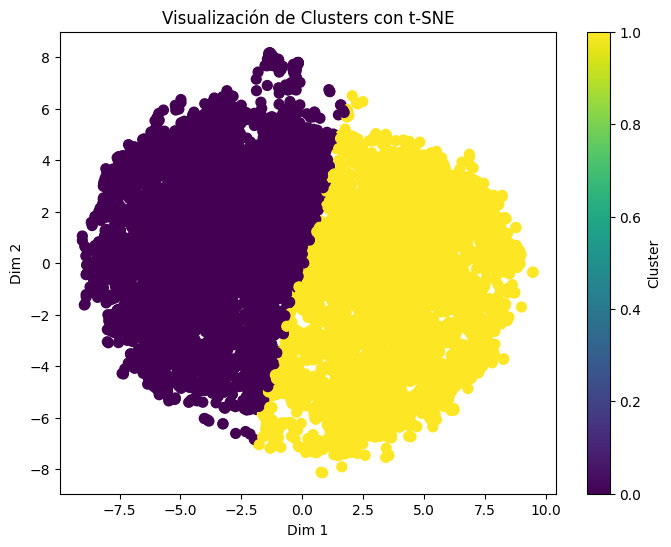

In [434]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(vectors_tsne[:, 0], vectors_tsne[:, 1], c=train_df['cluster'], cmap='viridis', s=50)
plt.title("Visualización de Clusters con t-SNE")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.colorbar(label="Cluster")
plt.show()


In [435]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

# Crear documentos etiquetados
tagged_data = [TaggedDocument(words=tokens, tags=[str(i)]) for i, tokens in enumerate(train_df['text_le'])]

# Entrenar el modelo
doc2vec_model = Doc2Vec(
    tagged_data, 
    vector_size=100,  # Ajusta según sea necesario
    window=5, 
    min_count=2, 
    epochs=20, 
    dm=1  # Usa PV-DM
)

# Obtener los vectores nuevamente
vectors = [doc2vec_model.infer_vector(tokens) for tokens in train_df['text_le']]



In [436]:
from collections import Counter

# Crear un diccionario con palabras por cluster
cluster_words = {cluster: [] for cluster in train_df['cluster'].unique()}
for cluster, tokens in zip(train_df['cluster'], train_df['text_le']):
    cluster_words[cluster].extend(tokens)

# Contar palabras por cluster
for cluster, words in cluster_words.items():
    print(f"\nCluster {cluster}:")
    most_common_words = Counter(words).most_common(10)  # Top 10 palabras
    print(most_common_words)



Cluster 0:
[('hotel', 2425), ('personal', 2049), ('excelente', 1855), ('desayuno', 1687), ('ubicacion', 1521), ('buen', 1434), ('amable', 1410), ('lugar', 1328), ('habitacion', 1300), ('atencion', 1232)]

Cluster 1:
[('habitacion', 2748), ('hotel', 1830), ('desayuno', 1082), ('hacer', 903), ('bano', 884), ('mas', 831), ('llegar', 797), ('noche', 788), ('cama', 780), ('dar', 760)]


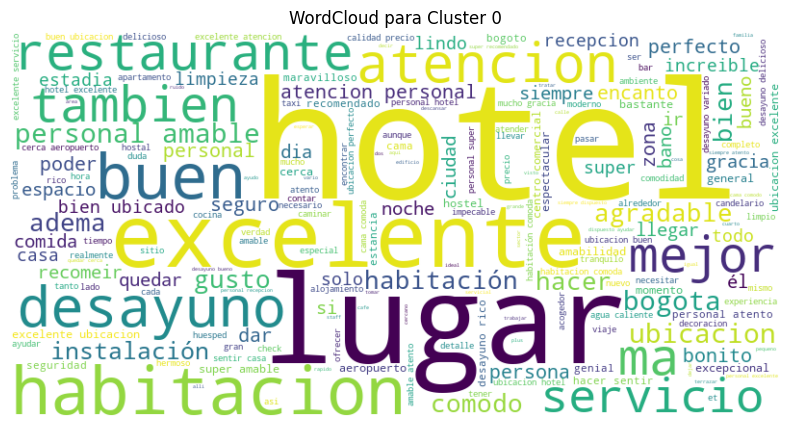

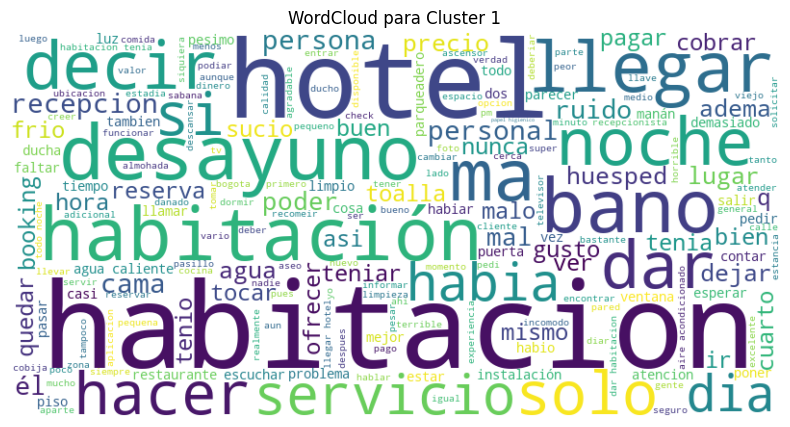

In [437]:
from wordcloud import WordCloud

for cluster in train_df['cluster'].unique():
    cluster_text = " ".join([" ".join(tokens) for tokens in train_df[train_df['cluster'] == cluster]['text_le']])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(cluster_text)
    
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f"WordCloud para Cluster {cluster}")
    plt.axis('off')
    plt.show()


In [438]:
from collections import Counter
import pandas as pd

# Contar palabras por cluster
cluster_words = {cluster: [] for cluster in train_df['cluster'].unique()}
for cluster, tokens in zip(train_df['cluster'], train_df['text_le']):
    cluster_words[cluster].extend(tokens)

# Calcular frecuencias relativas por cluster
word_freqs = {}
for cluster, words in cluster_words.items():
    total_words = len(words)
    word_freqs[cluster] = {word: count / total_words for word, count in Counter(words).items()}

# Convertir a DataFrame para facilitar análisis
freq_df = pd.DataFrame(word_freqs).fillna(0)  # Rellena palabras ausentes con 0


In [439]:
# Calcular diferencia relativa entre clusters
distinctive_words = {}
for cluster in word_freqs.keys():
    other_clusters = [c for c in word_freqs.keys() if c != cluster]
    distinctive_words[cluster] = freq_df[cluster] - freq_df[other_clusters].mean(axis=1)

# Top 10 palabras más distintivas por cluster
for cluster, words in distinctive_words.items():
    print(f"\nCluster {cluster}:")
    print(words.nlargest(10))



Cluster 0:
excelente    0.013816
ubicacion    0.010488
personal     0.009547
amable       0.009478
buen         0.008621
lugar        0.007836
cerca        0.007543
super        0.007280
atencion     0.005924
atento       0.005829
dtype: float64

Cluster 1:
habitacion    0.015901
habia         0.006593
ruido         0.005920
bano          0.005742
decir         0.005377
agua          0.005245
noche         0.005150
llegar        0.004670
reserva       0.004533
solo          0.004346
dtype: float64


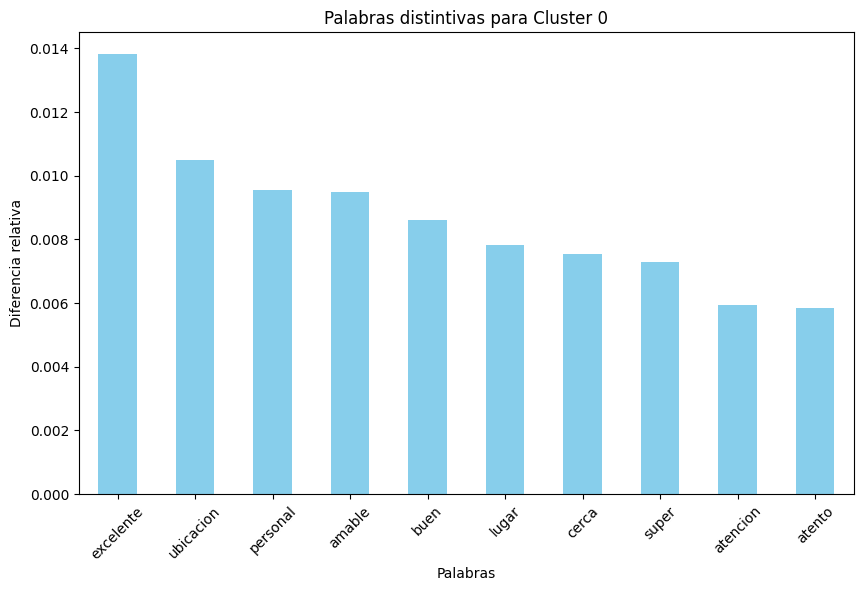

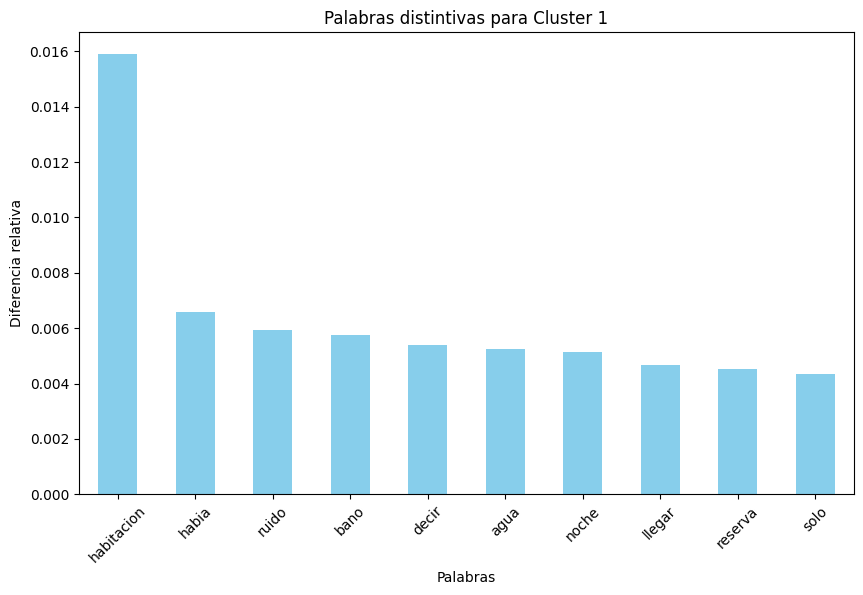

In [440]:
import matplotlib.pyplot as plt

for cluster, words in distinctive_words.items():
    top_words = words.nlargest(10)
    plt.figure(figsize=(10, 6))
    top_words.plot(kind='bar', color='skyblue')
    plt.title(f"Palabras distintivas para Cluster {cluster}")
    plt.xlabel("Palabras")
    plt.ylabel("Diferencia relativa")
    plt.xticks(rotation=45)
    plt.show()


In [441]:
### Comentarios de un cluster

pd.set_option('display.max_colwidth', None)

train_df[train_df['cluster'] == 0]['Comentario'].head(30)

4335                                                                                                                                                                                                                                                                                                                                          tuve una excelente experiencia el hotel está muy bien ubicado y todo fue genial el primer día que llegué a bogotá me sentí mal debido al mal de altura sin embargo recibí unas atenciones excelentes por parte de una de las chicas de recepción incluso me preparó un té y estuvo siempre pendiente de cómo me sentía realmente me sentí sumamente agradecido por ese gesto tan amable 
353                                                                                                                                                                                                                                                                                              

In [443]:
### Comentarios de un cluster

pd.set_option('display.max_colwidth', None)

train_df[train_df['cluster'] == 1]['Comentario'].head(30)

6749                                             el lugar que publican en booking no corresponde al real la habitación que se había seleccionado no correspondía era una cama doble y me iban a asignar tres camas sencillas la habitación asignada después no tenía agua la sister a del baño no se pudo dormir toda la noche se activaba una máquina que perturbaba el sueño el desayuno ofrecido pésimo 
9821                                                                                                   por parte del recepcionista todo muy bien pero la señora que atiende el desayuno y hace el aseo primero demasiado grosera para servir el desayuno y luego me cambio las toallas limpias que tenia y me trajo una que olía horrible y claramente no se había lavado pésimo servicio de parte de ella 
10402                                                                      la habitación no tiene ventilación natural ya que la única ventana no habré y aunque hay un conducto de aire acondicionado este se en